# IMPORTING PYTHON PACKAGES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.externals import joblib
import warnings
warnings.filterwarnings('ignore')

C:\Anaconda\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


# IMPORTING DATASET

In [2]:
df_hardware=pd.read_csv('machine.csv')
df_hardware

,vendor name,model name,myct,mmin,mmax,cach,chmin,chmax,prp,erp
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
...,...,...,...,...,...,...,...,...,...,...
204,sperry,80/8,124,1000,8000,0,1,8,42,37
205,sperry,90/80-model-3,98,1000,8000,32,2,8,46,50
206,sratus,32,125,2000,8000,0,2,14,52,41
207,wang,vs-100,480,512,8000,32,0,0,67,47


In [3]:
df_hardware.drop(df_hardware.columns[[1]],axis=1,inplace=True)

LABEL ENCODING

In [4]:
le=LabelEncoder()
list=['vendor name']
for val in list:
    df_hardware[val]=le.fit_transform(df_hardware[val].astype(str))
df_hardware

,vendor name,myct,mmin,mmax,cach,chmin,chmax,prp,erp
0,0,125,256,6000,256,16,128,198,199
1,1,29,8000,32000,32,8,32,269,253
2,1,29,8000,32000,32,8,32,220,253
3,1,29,8000,32000,32,8,32,172,253
4,1,29,8000,16000,32,8,16,132,132
...,...,...,...,...,...,...,...,...,...
204,27,124,1000,8000,0,1,8,42,37
205,27,98,1000,8000,32,2,8,46,50
206,28,125,2000,8000,0,2,14,52,41
207,29,480,512,8000,32,0,0,67,47


# EXPLORATORY DATA ANALYSIS

In [5]:
df_hardware.head()

,vendor name,myct,mmin,mmax,cach,chmin,chmax,prp,erp
0,0,125,256,6000,256,16,128,198,199
1,1,29,8000,32000,32,8,32,269,253
2,1,29,8000,32000,32,8,32,220,253
3,1,29,8000,32000,32,8,32,172,253
4,1,29,8000,16000,32,8,16,132,132


In [6]:
df_hardware.tail()

,vendor name,myct,mmin,mmax,cach,chmin,chmax,prp,erp
204,27,124,1000,8000,0,1,8,42,37
205,27,98,1000,8000,32,2,8,46,50
206,28,125,2000,8000,0,2,14,52,41
207,29,480,512,8000,32,0,0,67,47
208,29,480,1000,4000,0,0,0,45,25


In [7]:
df_hardware.shape

(209, 9)

In [8]:
df_hardware.dtypes

vendor name    int32
myct           int64
mmin           int64
mmax           int64
cach           int64
chmin          int64
chmax          int64
prp            int64
erp            int64
dtype: object

In [9]:
df_hardware.columns

Index(['vendor name', 'myct', 'mmin', 'mmax', 'cach', 'chmin', 'chmax', 'prp',
       'erp'],
      dtype='object')

In [10]:
df_hardware.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 9 columns):
vendor name    209 non-null int32
myct           209 non-null int64
mmin           209 non-null int64
mmax           209 non-null int64
cach           209 non-null int64
chmin          209 non-null int64
chmax          209 non-null int64
prp            209 non-null int64
erp            209 non-null int64
dtypes: int32(1), int64(8)
memory usage: 14.0 KB


In [11]:
df_hardware.describe()

,vendor name,myct,mmin,mmax,cach,chmin,chmax,prp,erp
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,15.937799,203.822967,2867.980861,11796.153110,25.205742,4.698565,18.267943,105.622010,99.330144
std,7.490440,260.262926,3878.742758,11726.564377,40.628722,6.816274,25.997318,160.830733,154.757102
min,0.000000,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,6.000000,15.000000
25%,10.000000,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,27.000000,28.000000
50%,17.000000,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000,50.000000,45.000000
75%,21.000000,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000,113.000000,101.000000
max,29.000000,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000,1150.000000,1238.000000


Data in most of the columns do not appear to have normal distribution, and have outliers (large difference between 75th percentile and max)

In [12]:
#sns.heatmap(df_hardware.isnull(),annot=True)

In [13]:
df_hardware.isnull().sum()

vendor name    0
myct           0
mmin           0
mmax           0
cach           0
chmin          0
chmax          0
prp            0
erp            0
dtype: int64

CHECKING DATA SKEWNESS

In [14]:
df_hardware.skew()

vendor name   -0.321296
myct           2.544153
mmin           3.515933
mmax           2.140663
cach           2.824777
chmin          4.027333
chmax          3.595905
prp            3.892814
erp            4.304024
dtype: float64

REMOVING DATA SKEWNESS

In [15]:
for col in df_hardware.columns:
    if df_hardware.skew().loc[col]>0.55:
        df_hardware[col]=np.log1p(df_hardware[col])
df_hardware.skew()

vendor name   -0.321296
myct           0.415296
mmin           0.040116
mmax          -0.613670
cach           0.042585
chmin          0.802618
chmax          0.136018
prp            0.570233
erp            0.965760
dtype: float64

CHECKING OUTLIERS

In [16]:
z=np.abs(zscore(df_hardware))
print(z.shape)
print(np.where(z>3))

(209, 9)
(array([  9,  14, 196, 197, 199], dtype=int64), array([8, 3, 5, 5, 8], dtype=int64))


REMOVING OUTLIERS

In [17]:
df_final=df_hardware.loc[(z<3).all(axis=1)]
print(df_final.shape)

(204, 9)


In [18]:
df_final.skew()

vendor name   -0.324916
myct           0.408542
mmin           0.081953
mmax          -0.290247
cach           0.048526
chmin          0.619058
chmax          0.033509
prp            0.483502
erp            0.882235
dtype: float64

BOXPLOT

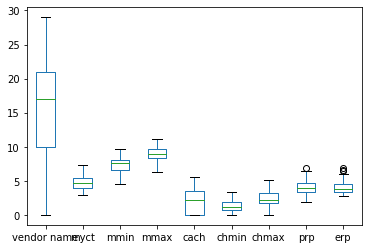

In [19]:
df_final.plot.box()

CORRELATION

In [20]:
df_final.corr()

,vendor name,myct,mmin,mmax,cach,chmin,chmax,prp,erp
vendor name,1.000000,-0.043070,0.088454,0.007730,0.001169,-0.091950,-0.130831,-0.073046,-0.025530
myct,-0.043070,1.000000,-0.724317,-0.632461,-0.602446,-0.615298,-0.535778,-0.693064,-0.716490
mmin,0.088454,-0.724317,1.000000,0.710292,0.585754,0.565725,0.417839,0.754913,0.799936
mmax,0.007730,-0.632461,0.710292,1.000000,0.602587,0.452602,0.485914,0.790867,0.887801
cach,0.001169,-0.602446,0.585754,0.602587,1.000000,0.486127,0.454145,0.754873,0.764624
chmin,-0.091950,-0.615298,0.565725,0.452602,0.486127,1.000000,0.681454,0.642712,0.647298
chmax,-0.130831,-0.535778,0.417839,0.485914,0.454145,0.681454,1.000000,0.602281,0.583035
prp,-0.073046,-0.693064,0.754913,0.790867,0.754873,0.642712,0.602281,1.000000,0.913248
erp,-0.025530,-0.716490,0.799936,0.887801,0.764624,0.647298,0.583035,0.913248,1.000000


PAIRPLOT

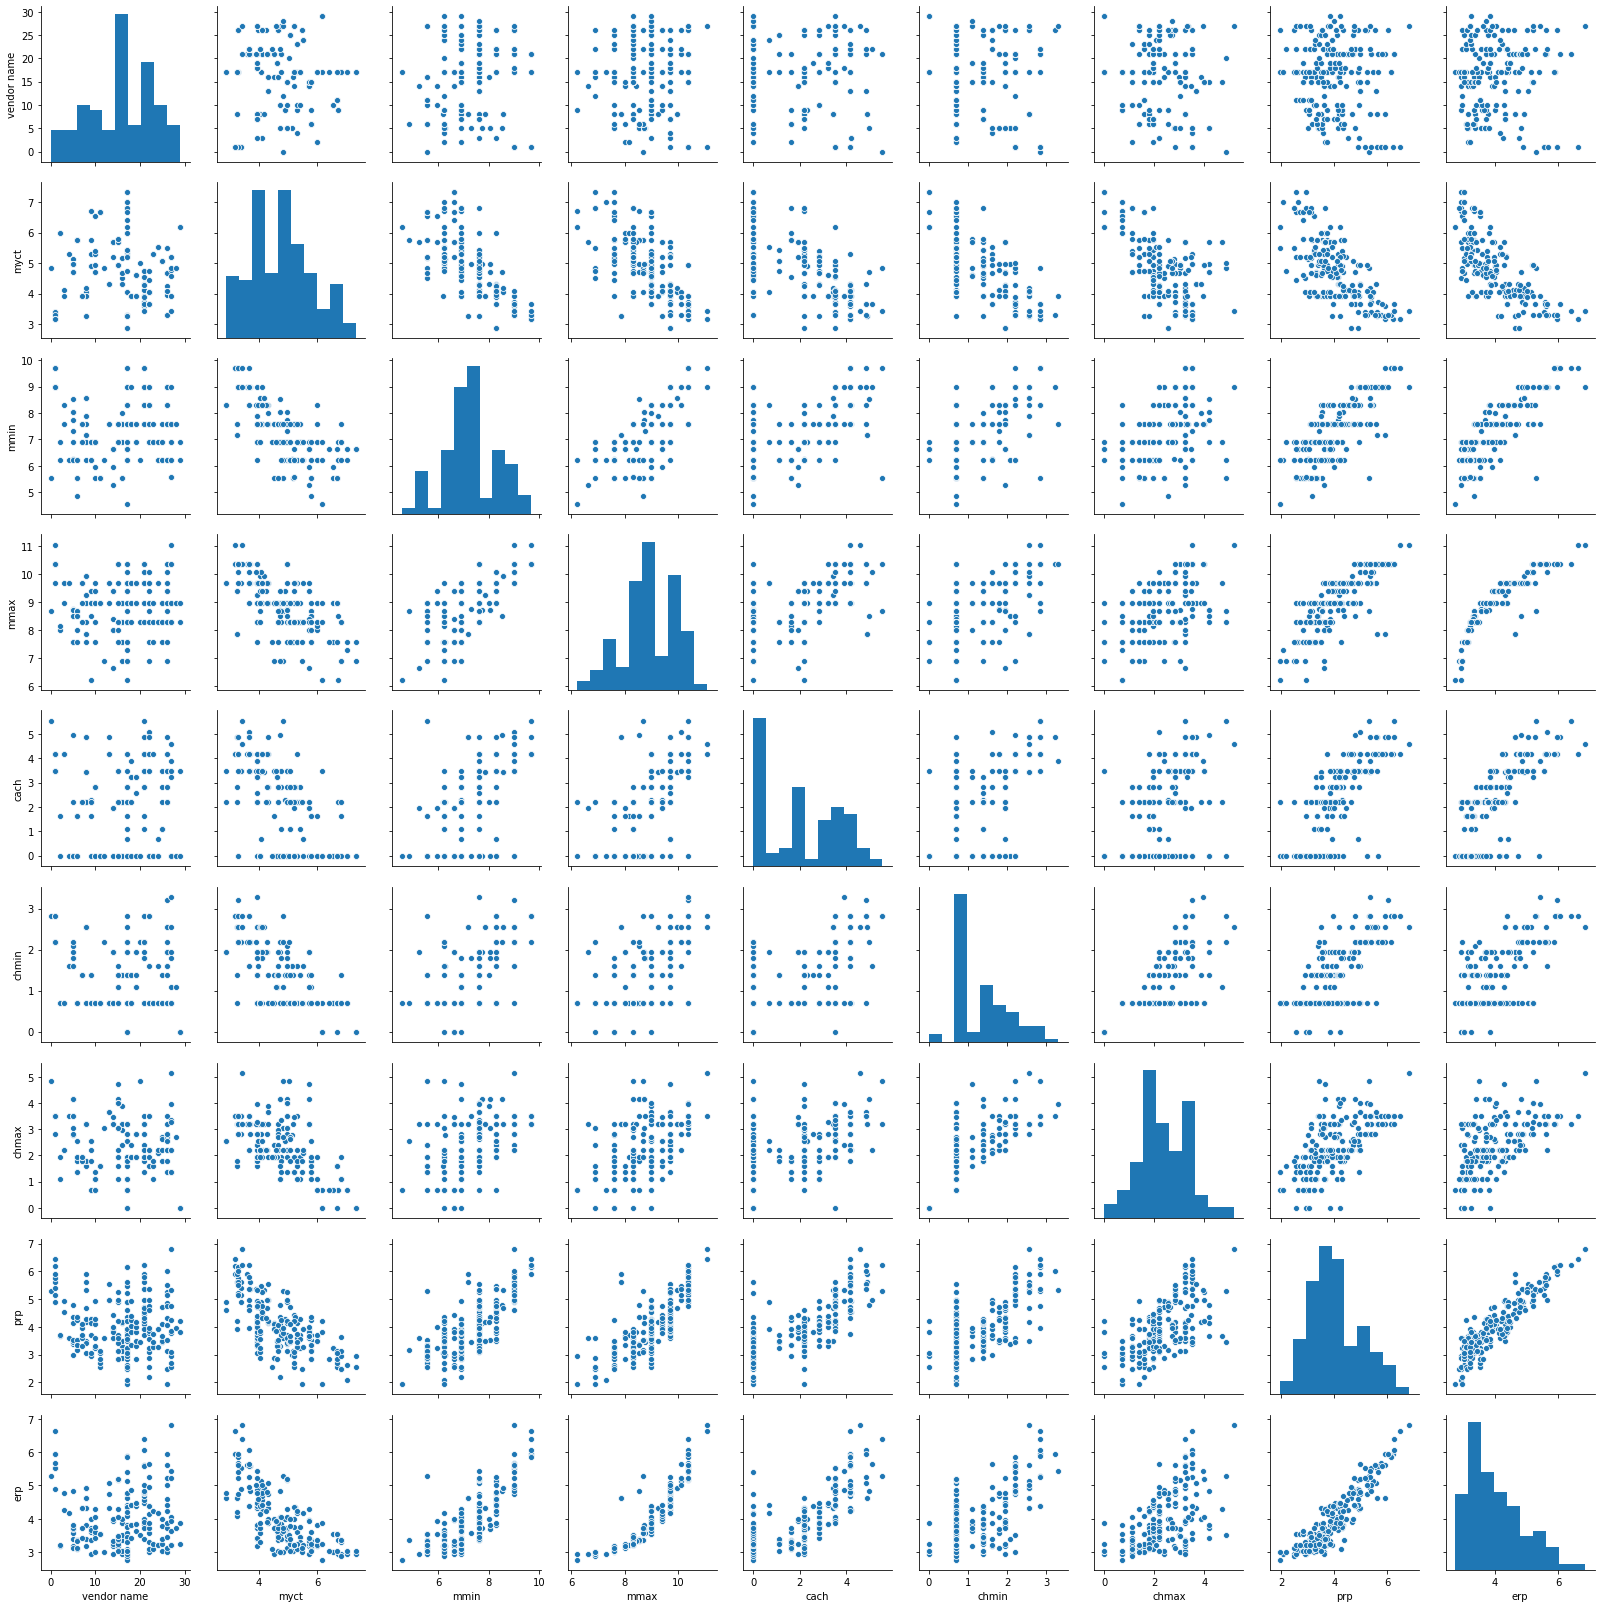

In [21]:
sns.pairplot(df_final)

# TRAIN AND TEST DATA

In [22]:
df_x=df_final.iloc[:,:-1]
print(df_x)
y=df_final.iloc[:,-1]
print(y)
print()
print(df_x.shape)
print(y.shape)

     vendor name      myct      mmin       mmax      cach     chmin     chmax  \
0              0  4.836282  5.549076   8.699681  5.549076  2.833213  4.859812   
1              1  3.401197  8.987322  10.373522  3.496508  2.197225  3.496508   
2              1  3.401197  8.987322  10.373522  3.496508  2.197225  3.496508   
3              1  3.401197  8.987322  10.373522  3.496508  2.197225  3.496508   
4              1  3.401197  8.987322   9.680406  3.496508  2.197225  2.833213   
..           ...       ...       ...        ...       ...       ...       ...   
204           27  4.828314  6.908755   8.987322  0.000000  0.693147  2.197225   
205           27  4.595120  6.908755   8.987322  3.496508  1.098612  2.197225   
206           28  4.836282  7.601402   8.987322  0.000000  1.098612  2.708050   
207           29  6.175867  6.240276   8.987322  3.496508  0.000000  0.000000   
208           29  6.175867  6.908755   8.294300  0.000000  0.000000  0.000000   

          prp  
0    5.2933

In [23]:
x=df_x

# TRAINING AND TESTING - VARIOUS MODELS

FUNCTION DECLARATION

In [24]:
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("R2 Score corresponding to ",r_state," is ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("Maximum R2 Score corresponds to ",final_r_state," is ",max_r_score)
    return(final_r_state)

LINEAR REGRESSION

In [25]:
lr=LinearRegression()
r_state=maxr2_score(lr,x,y)

R2 Score corresponding to  42  is  0.8849193635456849
R2 Score corresponding to  43  is  0.9404367837217957
R2 Score corresponding to  44  is  0.9008132446519288
R2 Score corresponding to  45  is  0.885125923810039
R2 Score corresponding to  46  is  0.9253491486785841
R2 Score corresponding to  47  is  0.9390121039735548
R2 Score corresponding to  48  is  0.9131099069006985
R2 Score corresponding to  49  is  0.9436363620799458
R2 Score corresponding to  50  is  0.8995627813836395
R2 Score corresponding to  51  is  0.931575931601292
R2 Score corresponding to  52  is  0.9436522102365377
R2 Score corresponding to  53  is  0.9433374839413338
R2 Score corresponding to  54  is  0.9195171776440249
R2 Score corresponding to  55  is  0.9114638271101728
R2 Score corresponding to  56  is  0.9118635868532478
R2 Score corresponding to  57  is  0.9232795870902033
R2 Score corresponding to  58  is  0.9017223136904375
R2 Score corresponding to  59  is  0.9407502410053719
R2 Score corresponding to  60 

In [26]:
print("Mean R2 Score for Linear Regression is ",cross_val_score(linear_model.LinearRegression(),x,y,cv=5,scoring='r2').mean())
print("Standard Deviation in R2 Score for Linear Regression is ",cross_val_score(linear_model.LinearRegression(),x,y,cv=5,scoring='r2').std())

Mean R2 Score for Linear Regression is  0.9029146320464211
Standard Deviation in R2 Score for Linear Regression is  0.03999007998527711


KNEIGHBORS REGRESSOR

In [27]:
neighbors={"n_neighbors":range(1,30)}
knr=KNeighborsRegressor()
gknr=GridSearchCV(knr,neighbors,cv=5)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 2}

In [28]:
knr=KNeighborsRegressor(n_neighbors=2)
r_state=maxr2_score(knr,x,y)

R2 Score corresponding to  42  is  0.8490675308875621
R2 Score corresponding to  43  is  0.9197931958611395
R2 Score corresponding to  44  is  0.8694563223924978
R2 Score corresponding to  45  is  0.8957785100509326
R2 Score corresponding to  46  is  0.8742969263238043
R2 Score corresponding to  47  is  0.8787071399576014
R2 Score corresponding to  48  is  0.8642083509479714
R2 Score corresponding to  49  is  0.8994154953893562
R2 Score corresponding to  50  is  0.8506341714869591
R2 Score corresponding to  51  is  0.8320475967645994
R2 Score corresponding to  52  is  0.9018341576449629
R2 Score corresponding to  53  is  0.8815908110857447
R2 Score corresponding to  54  is  0.7579891062513078
R2 Score corresponding to  55  is  0.8531809137377454
R2 Score corresponding to  56  is  0.8317537530327717
R2 Score corresponding to  57  is  0.9096302736612049
R2 Score corresponding to  58  is  0.831072208761848
R2 Score corresponding to  59  is  0.8390511714966449
R2 Score corresponding to  60

In [29]:
print("Mean R2 Score for KNN Regression is ",cross_val_score(knr,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation in R2 Score for KNN Regression is ",cross_val_score(knr,x,y,cv=5,scoring='r2').std())

Mean R2 Score for KNN Regression is  0.605864262751969
Standard Deviation in R2 Score for KNN Regression is  0.24517127579139986


LASSO REGRESSION

In [30]:
ls=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf=GridSearchCV(ls,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.01}

In [31]:
ls=Lasso(alpha=0.01)
r_state=maxr2_score(ls,x,y)

R2 Score corresponding to  42  is  0.8877647189828025
R2 Score corresponding to  43  is  0.9382533634050824
R2 Score corresponding to  44  is  0.9083980327159824
R2 Score corresponding to  45  is  0.8905806521149349
R2 Score corresponding to  46  is  0.9233385438102064
R2 Score corresponding to  47  is  0.9355233219901381
R2 Score corresponding to  48  is  0.9163650086262325
R2 Score corresponding to  49  is  0.9422114818998139
R2 Score corresponding to  50  is  0.9064088537480892
R2 Score corresponding to  51  is  0.931015606958922
R2 Score corresponding to  52  is  0.9393155197792565
R2 Score corresponding to  53  is  0.9441291610667688
R2 Score corresponding to  54  is  0.9212913356503694
R2 Score corresponding to  55  is  0.9166021880438545
R2 Score corresponding to  56  is  0.9147745487482132
R2 Score corresponding to  57  is  0.9339037363466014
R2 Score corresponding to  58  is  0.9030758784182054
R2 Score corresponding to  59  is  0.9430614801980056
R2 Score corresponding to  60

In [32]:
print("Mean R2 Score for Lasso Regression is ",cross_val_score(ls,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation in R2 Score for Lasso Regression is ",cross_val_score(ls,x,y,cv=5,scoring="r2").std())

Mean R2 Score for Lasso Regression is  0.9062469074589975
Standard Deviation in R2 Score for Lasso Regression is  0.04021552415533326


RIDGE REGRESSION

In [33]:
rd=Ridge()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf=GridSearchCV(rd,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'alpha': 1}

In [34]:
rd=Ridge(alpha=1)
r_state=maxr2_score(rd,x,y)

R2 Score corresponding to  42  is  0.8839436783572077
R2 Score corresponding to  43  is  0.9402371573204292
R2 Score corresponding to  44  is  0.9017725065116665
R2 Score corresponding to  45  is  0.8855825872339163
R2 Score corresponding to  46  is  0.9253222211147187
R2 Score corresponding to  47  is  0.9386308973844798
R2 Score corresponding to  48  is  0.913999816659254
R2 Score corresponding to  49  is  0.9433116662655845
R2 Score corresponding to  50  is  0.900938314752495
R2 Score corresponding to  51  is  0.9308091256001121
R2 Score corresponding to  52  is  0.9428897341991207
R2 Score corresponding to  53  is  0.9435898559964145
R2 Score corresponding to  54  is  0.9193541200482347
R2 Score corresponding to  55  is  0.9120937317741525
R2 Score corresponding to  56  is  0.9126564166700528
R2 Score corresponding to  57  is  0.9248985848265621
R2 Score corresponding to  58  is  0.9018086763411413
R2 Score corresponding to  59  is  0.9406705213753518
R2 Score corresponding to  60 

In [35]:
print("Mean R2 Score for Ridge Regression is ",cross_val_score(rd,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation in R2 Score for Ridge Regression is ",cross_val_score(rd,x,y,cv=5,scoring="r2").std())

Mean R2 Score for Ridge Regression is  0.9032394103461335
Standard Deviation in R2 Score for Ridge Regression is  0.040605153595128056


ELASTIC NET REGRESSION

In [36]:
enr=ElasticNet()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf=GridSearchCV(enr,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.01}

In [37]:
enr=ElasticNet(alpha=0.01)
r_state=maxr2_score(enr,x,y)

R2 Score corresponding to  42  is  0.8855390839565856
R2 Score corresponding to  43  is  0.9390921629164485
R2 Score corresponding to  44  is  0.906176997837765
R2 Score corresponding to  45  is  0.8890713980211822
R2 Score corresponding to  46  is  0.9244220076541325
R2 Score corresponding to  47  is  0.936973380091433
R2 Score corresponding to  48  is  0.9156709409352616
R2 Score corresponding to  49  is  0.9427783109452376
R2 Score corresponding to  50  is  0.9047157888053977
R2 Score corresponding to  51  is  0.9306119836630916
R2 Score corresponding to  52  is  0.9407307171480802
R2 Score corresponding to  53  is  0.9444594363950117
R2 Score corresponding to  54  is  0.9203283013113612
R2 Score corresponding to  55  is  0.9155389432504087
R2 Score corresponding to  56  is  0.9144688347380057
R2 Score corresponding to  57  is  0.9308179835964963
R2 Score corresponding to  58  is  0.9029928105881914
R2 Score corresponding to  59  is  0.9423869074024998
R2 Score corresponding to  60 

In [38]:
print("Mean R2 Score for Elastic Net Regression is ",cross_val_score(enr,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation in R2 Score for Elastic Net Regression is ",cross_val_score(enr,x,y,cv=5,scoring="r2").std())

Mean R2 Score for Elastic Net Regression is  0.9055375477062378
Standard Deviation in R2 Score for Elastic Net Regression is  0.04106775536753123


GRADIENT BOOSTING REGRESSOR

In [39]:
gbr=GradientBoostingRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
clf=GridSearchCV(gbr,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.1, 'n_estimators': 1000}

In [40]:
gbr=GradientBoostingRegressor(learning_rate=0.1,n_estimators=1000)
r_state=maxr2_score(gbr,x,y)

R2 Score corresponding to  42  is  0.9816470819715171
R2 Score corresponding to  43  is  0.9423798829792328
R2 Score corresponding to  44  is  0.9865503972744825
R2 Score corresponding to  45  is  0.9682265446691258
R2 Score corresponding to  46  is  0.9550766195822031
R2 Score corresponding to  47  is  0.9631936997190467
R2 Score corresponding to  48  is  0.9828038707718965
R2 Score corresponding to  49  is  0.9747841286716344
R2 Score corresponding to  50  is  0.97981739336659
R2 Score corresponding to  51  is  0.9864162448858076
R2 Score corresponding to  52  is  0.9886894551029671
R2 Score corresponding to  53  is  0.9853410981719462
R2 Score corresponding to  54  is  0.9779458913892829
R2 Score corresponding to  55  is  0.9912825374279511
R2 Score corresponding to  56  is  0.9522362839442406
R2 Score corresponding to  57  is  0.9854008634700729
R2 Score corresponding to  58  is  0.9688948200577722
R2 Score corresponding to  59  is  0.9751724354748826
R2 Score corresponding to  60 

In [41]:
print("Mean R2 Score for Gradient Boosting Regressor is ",cross_val_score(gbr,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation in R2 Score for Gradient Boosting Regressor is ",cross_val_score(gbr,x,y,cv=5,scoring="r2").std())

Mean R2 Score for Gradient Boosting Regressor is  0.9668889476998961
Standard Deviation in R2 Score for Gradient Boosting Regressor is  0.024212793645430584


# BEST MODEL

R2 SCORE AND RMSE

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=68,test_size=0.20)
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
y_pred=gbr.predict(x_test)
print("R2 Score is ",r2_score(y_test,y_pred))
print("RMSE is ",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 Score is  0.9943111199693977
RMSE is  0.05989087606897271


CROSS VALIDATION

In [43]:
score=cross_val_score(gbr,x,y,cv=5)
print('Score is ',score)
print('Mean Score is ', score.mean())
print('Standard Deviation is ',score.std())

Score is  [0.91897386 0.978058   0.99655905 0.96704053 0.95775193]
Mean Score is  0.9636766758641511
Standard Deviation is  0.025817951308259493


# PICKLE

In [44]:
joblib.dump(gbr,'hardware.pkl')

['hardware.pkl']